In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [ ]:
df = pd.read_csv("/content/mushroom_cleaned.csv")
display(df.head())
print("number of features :",df.shape[1])
print("number of samples :",df.shape[0])

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


number of features : 9
number of samples : 54035


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


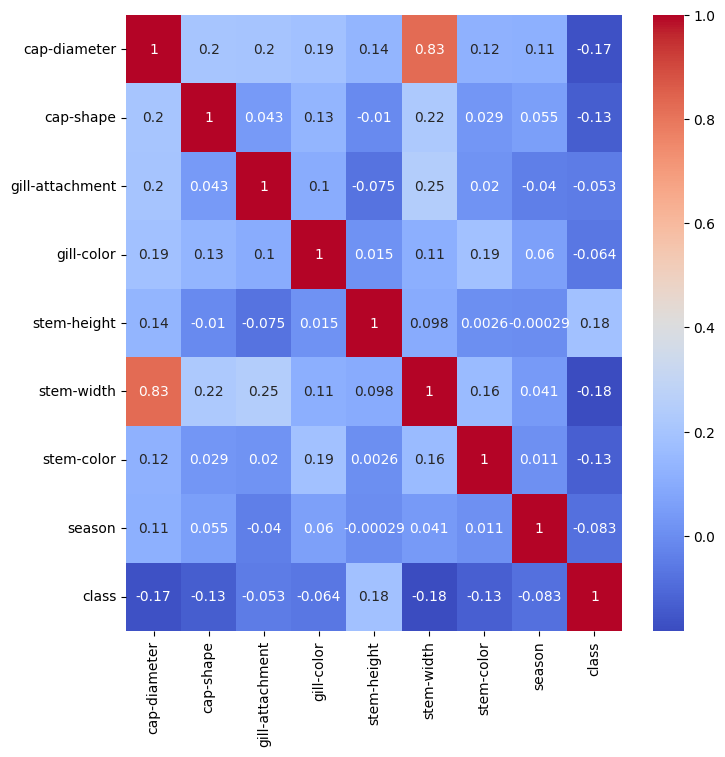

In [ ]:
corr_mat = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr_mat,annot=True, cmap="coolwarm")
plt.show()

<Figure size 2000x2000 with 0 Axes>

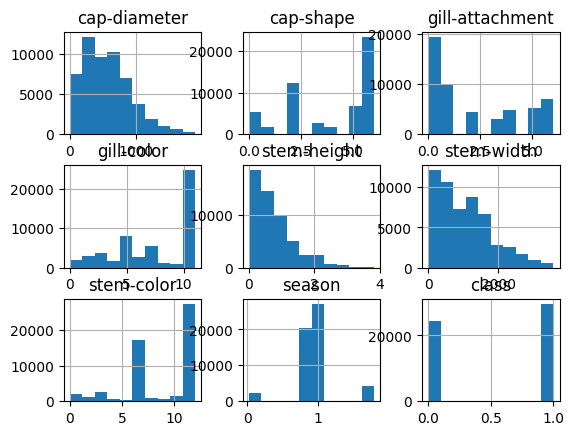

In [ ]:
plt.figure(figsize=(20, 20))
df.hist()
plt.show()

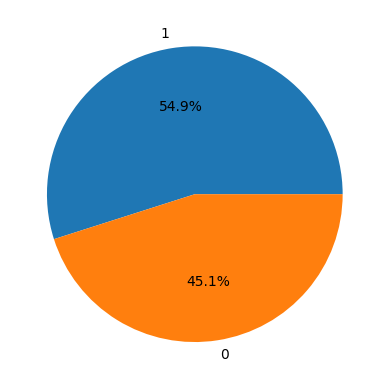

In [ ]:
plt.pie(df['class'].value_counts(),labels = df['class'].value_counts().index, autopct='%.1f%%' )
plt.show()

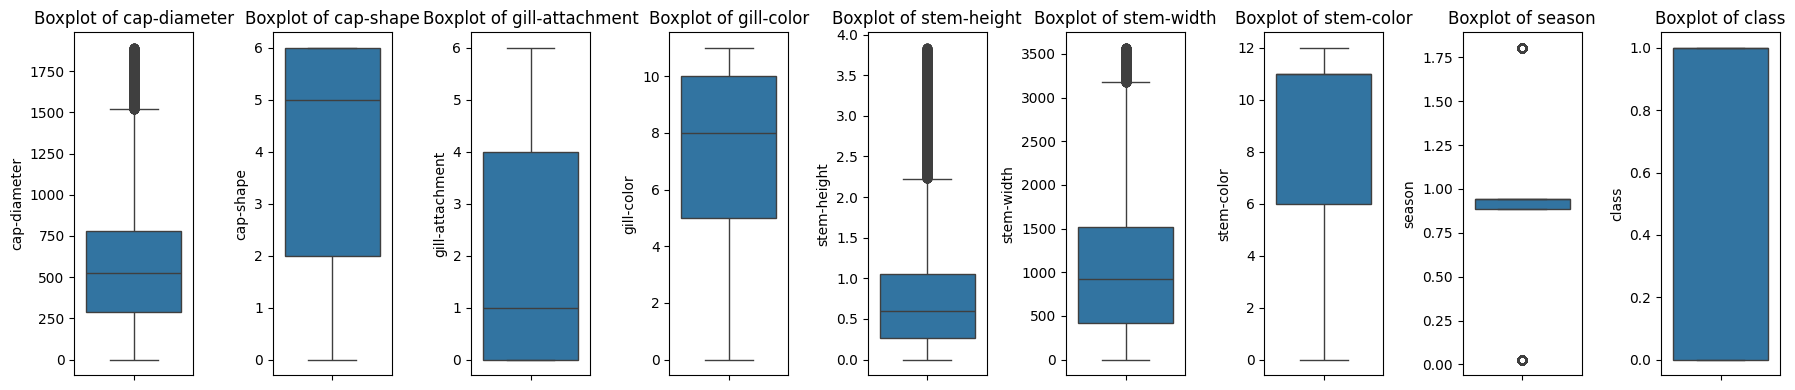

In [ ]:
num_columns = len(df.columns)

fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 2, 4))

for i, ax in enumerate(axes):
    sns.boxplot(y=df.iloc[:, i], ax=ax)
    ax.set_title(f'Boxplot of {df.columns[i]}')

plt.tight_layout()
plt.show()

In [ ]:
shuffled_df = df.sample(frac=1, random_state=42)
display(shuffled_df)
print("number of features :",shuffled_df.shape[1])
print("number of samples :",shuffled_df.shape[0])

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
14085,826,2,0,10,0.044195,2433,6,1.804273,0
19006,571,6,2,4,0.536738,761,4,0.943195,1
50623,1122,2,0,0,0.450051,1942,11,0.943195,0
41819,278,2,0,4,0.190566,576,11,0.943195,0
8085,735,2,6,10,1.455884,1077,11,0.888450,1
...,...,...,...,...,...,...,...,...,...
11284,284,0,0,3,0.235186,506,10,0.888450,1
44732,973,6,4,6,1.328557,2812,10,0.943195,1
38158,88,0,0,5,0.720623,83,6,0.888450,1
860,1276,2,0,10,2.343199,1735,11,0.943195,0


number of features : 9
number of samples : 54035


In [ ]:
outliers = ['cap-diameter','stem-height','stem-width']

for i in outliers:
  Q1 = shuffled_df[i].quantile(0.25)
  Q3 = shuffled_df[i].quantile(0.75)

  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  median = shuffled_df[i].median()
  shuffled_df[i] = shuffled_df[i].apply(lambda x : median if x > upper or x < lower else x)

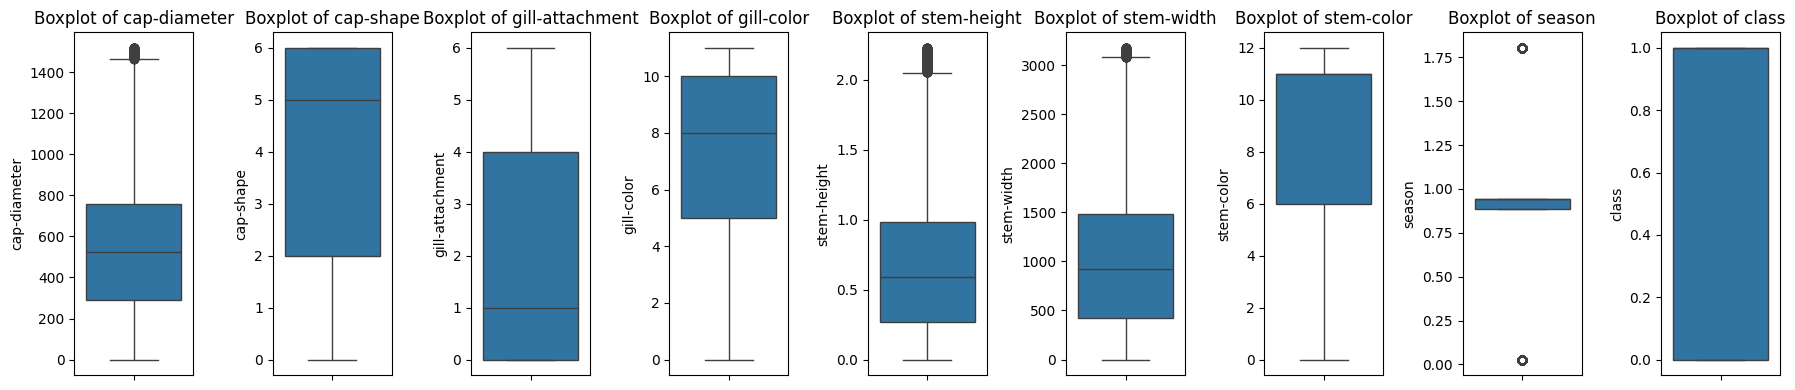

In [ ]:
num_columns = len(shuffled_df.columns)

fig, axes = plt.subplots(1, num_columns, figsize=(num_columns * 2, 4))

for i, ax in enumerate(axes):
    sns.boxplot(y=shuffled_df.iloc[:, i], ax=ax)
    ax.set_title(f'Boxplot of {shuffled_df.columns[i]}')

plt.tight_layout()
plt.show()

In [ ]:
x = shuffled_df.drop(columns=['class'])
y = shuffled_df['class']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42, stratify=y)

In [ ]:
scores = []
classifiers = [

    LogisticRegression(max_iter=1000),
    GaussianNB(),
    DecisionTreeClassifier(),

]

for model in classifiers:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    cv_score = cross_val_score(estimator=model,X= X_train,y= y_train, cv=5, scoring="accuracy")

    y_pred=model.predict(X_test)
    model_name = type(model).__name__
    print (model_name)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

    scores.append((model_name,(f'{100*score:.2f}%'), (f'{100*cv_score.mean():.2f}%')))

scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score(test)','Accuracy Score(cv)'])
scores_df.to_csv("results.csv")
scores_df.sort_values(by='Accuracy Score(test)',axis=0,ascending=False)

LogisticRegression
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      6090
           1       0.66      0.71      0.68      7419

    accuracy                           0.64     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.64      0.64      0.64     13509

[[3360 2730]
 [2157 5262]]
GaussianNB
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      6090
           1       0.66      0.71      0.69      7419

    accuracy                           0.64     13509
   macro avg       0.64      0.64      0.64     13509
weighted avg       0.64      0.64      0.64     13509

[[3434 2656]
 [2159 5260]]
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6090
           1       0.97      0.98      0.98      7419

    accuracy                           0.97     13509
   macro avg       0.

,Classifier,Accuracy Score(test),Accuracy Score(cv)
2,DecisionTreeClassifier,97.29%,97.36%
1,GaussianNB,64.36%,63.73%
0,LogisticRegression,63.82%,63.20%


In [ ]:
best_model = classifiers[0]

In [ ]:
joblib.dump(best_model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']